# Music Genre Classification with k-Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from util import plot_confusion_matrix

%matplotlib inline

In [2]:
# load the 3-second variation of the dataset and create a pandas dataframe
path_3_sec = ('../Data/features_3_sec.csv')
path_30_sec = ('../Data/features_3_sec.csv')
df = pd.read_csv(path_3_sec)
df = df.drop(['filename','length'], axis=1)

df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
#Before Applying one hot encoding, store the original labels
y_original = df["label"]
unique_labels = y_original.unique()
unique_labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [4]:
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(df[["label"]])
minmaxscalar = preprocessing.MinMaxScaler()
df.loc[:, df.columns != 'label'] = minmaxscalar.fit_transform(df.loc[:, df.columns != 'label'])

df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781,blues
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548,blues
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062,blues
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873,blues
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713,blues


In [5]:
x,y = (df.iloc[:,df.columns != "label"],y)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.33)

print(X_test.shape,y_test.shape)

(2007, 57) (2007, 10)


In [6]:
#Create KNN Classifier (baseline)
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
#knn.fit(nca.transform(X_train), y_train)
knn.fit(X_train, y_train)
#Predict the response for the 3 datasets


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

## Baseline Model and Evaluation 

In [7]:
yhat = knn.predict(X_test)

# predict on validation set
val_pred = knn.predict(X_valid)

# evaluate the model
acc_train = knn.score(X_train, y_train)
acc_val = accuracy_score(y_valid, val_pred)
acc_test = accuracy_score(y_test, yhat)
print('Accuracy on train set: %.2f' % (acc_train*100))
print('Accuracy on test set: %.2f' % (acc_test*100))
print('Accuracy on valid set: %.2f' % (acc_val*100))

Accuracy on train set: 81.85
Accuracy on test set: 75.78
Accuracy on valid set: 77.37


In [8]:
from sklearn.metrics import mean_squared_error

val_pred,train_pred,test_pred = knn.predict(X_valid),knn.predict(X_train),knn.predict(X_test)

train_err = mean_squared_error(y_train, train_pred)
val_err = mean_squared_error(y_valid, val_pred)
test_err = mean_squared_error(y_test,test_pred)


print('Error on train set: %.2f' % (train_err))
print('Error on valid set: %.2f' % (val_err))
print('Error on test set: %.2f' % (test_err))

Error on train set: 0.02
Error on valid set: 0.03
Error on test set: 0.03


In [9]:
acc = []

# Calculating acc for K values between 1 and 57
for k in range(1,20):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

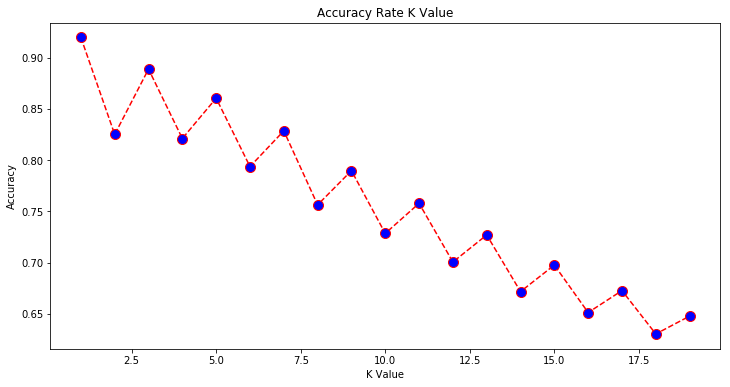

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.savefig("../plots/KNN_Accuracy")

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

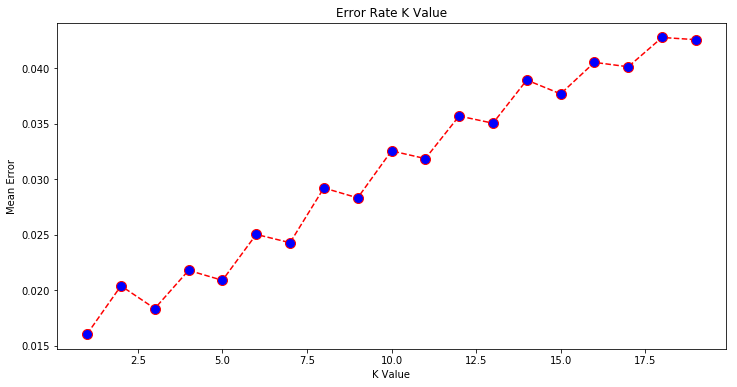

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig("../plots/KNN_Error")

Confusion matrix, without normalization
[[175   1   3   1   0   6   0   0   4   0]
 [  7 183   2   0   0   2   0   0   0   0]
 [ 38   1 134   2   0   3   0   0   7   3]
 [ 41   3   1 151   3   2   0   0   2   1]
 [ 32   0   2   1 143   0   4   8   3   0]
 [ 30  17   5   2   0 152   0   0   0   0]
 [ 20   0   0   0   2   0 168   0   0   4]
 [ 29   2   1   4   2   0   0 146   3   1]
 [ 40   0   1   2   3   0   0   2 160   0]
 [ 69   0   4  12   0   6   3   2   3 143]]


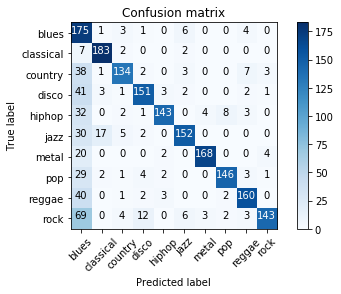

In [13]:
preds = np.argmax(yhat,axis=1)
label = np.argmax(y_test,axis=1)
cm = confusion_matrix(label,preds)
test_label = df["label"].unique()
label = list(test_label)
plot_confusion_matrix(cm, label,title='Confusion matrix', save = "CV_KNN_Baseline")

##  Finetuning Model with Grid Search 


In [14]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors':list(range(2,10)),
    'weights' :['uniform','distance'],
    'metric' :['euclidean','manhattan']
}
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose =1, cv =3,n_jobs =-1)
gs_results = gs.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  4.1min finished


In [15]:
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9131989131989132
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')
{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


## Final Model

In [16]:
knn = KNeighborsClassifier(n_neighbors=2,weights = 'distance',
                          metric='manhattan')

knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [17]:
acc_knn_valid = knn.score(X_valid, y_valid)
acc_knn_train = knn.score(X_train, y_train)
acc_knn_test = knn.score(X_test, y_test)


print('valid score: ',acc_knn_valid)
print('train score: ',acc_knn_train)
print('test score: ',acc_knn_test)

valid score:  0.9484848484848485
train score:  0.9985699985699986
test score:  0.9372197309417041


Confusion matrix, without normalization
[[177   1   3   2   0   4   0   0   1   2]
 [  1 184   2   0   0   6   0   1   0   0]
 [  2   0 168   2   2   6   0   0   6   2]
 [  0   0   2 195   1   1   0   1   1   3]
 [  0   0   1   0 185   0   0   2   3   2]
 [  1   7   3   0   0 193   0   1   1   0]
 [  1   0   0   0   1   0 190   0   0   2]
 [  0   2   2   1   3   0   0 179   0   1]
 [  0   0   2   2   1   2   0   1 197   3]
 [  3   0   3   9   0   3   5   1   5 213]]


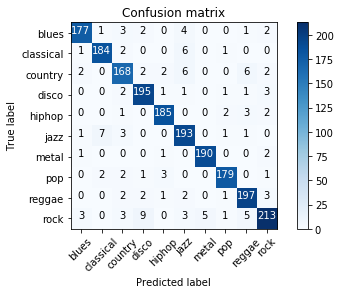

In [18]:
yhat = knn.predict(X_test)
preds = np.argmax(yhat,axis=1)
label = np.argmax(y_test,axis=1)
cm = confusion_matrix(label,preds)
test_label = df["label"].unique()
label = list(test_label)
plot_confusion_matrix(cm, label,title='Confusion matrix')